In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt


In [3]:
## dataset link : https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_dataset=datagen.flow_from_directory(
    r"/kaggle/input/chest-xray-pneumonia/chest_xray/train",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    subset="training",
    seed=42)
valid_dataset=datagen.flow_from_directory(
    r"/kaggle/input/chest-xray-pneumonia/chest_xray/val",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=False,
    seed=42)
test_dataset=datagen.flow_from_directory(
    r"/kaggle/input/chest-xray-pneumonia/chest_xray/test",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=False,
    seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

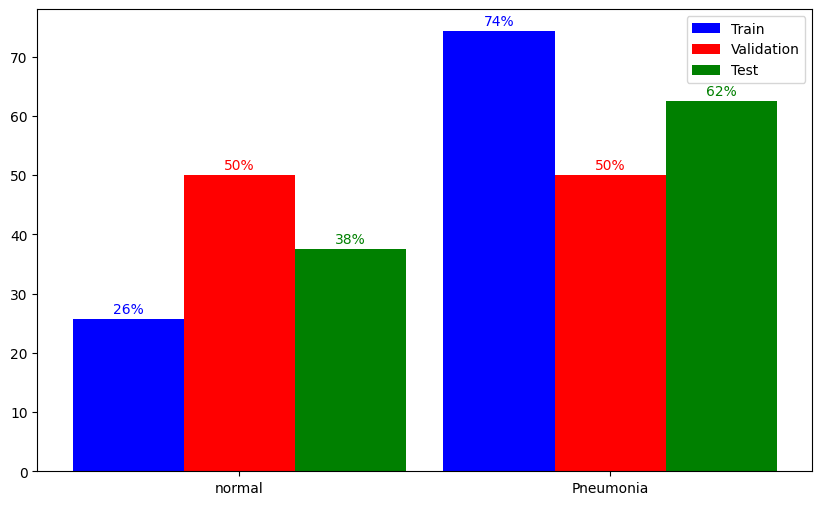

In [5]:
train_counts = np.bincount(train_dataset.classes)
valid_counts = np.bincount(valid_dataset.classes)
test_counts = np.bincount(test_dataset.classes)

plt.figure(figsize=[10,6])

labels = ["normal", "Pneumonia"]

total_train = np.sum(train_counts)
total_valid = np.sum(valid_counts)
total_test = np.sum(test_counts)

# Calculate the percentages
train_percentages = (train_counts / total_train) * 100
valid_percentages = (valid_counts / total_valid) * 100
test_percentages = (test_counts / total_test) * 100

bar_width = 0.3
x = np.arange(len(labels))

plt.bar(x, train_percentages, width=bar_width, color='blue', label="Train")
plt.bar(x + bar_width, valid_percentages, width=bar_width, color='red', label="Validation")
plt.bar(x + 2*bar_width, test_percentages, width=bar_width, color='green', label="Test")

for i in range(len(labels)):
    plt.text(i, train_percentages[i] + 1, f"{train_percentages[i]:.0f}%", ha='center', color='blue')
    plt.text(i + bar_width, valid_percentages[i] + 1, f"{valid_percentages[i]:.0f}%", ha='center', color='red')
    plt.text(i + 2*bar_width, test_percentages[i] + 1, f"{test_percentages[i]:.0f}%", ha='center', color='green')

plt.xticks(x + bar_width, labels)

plt.legend()

plt.show()


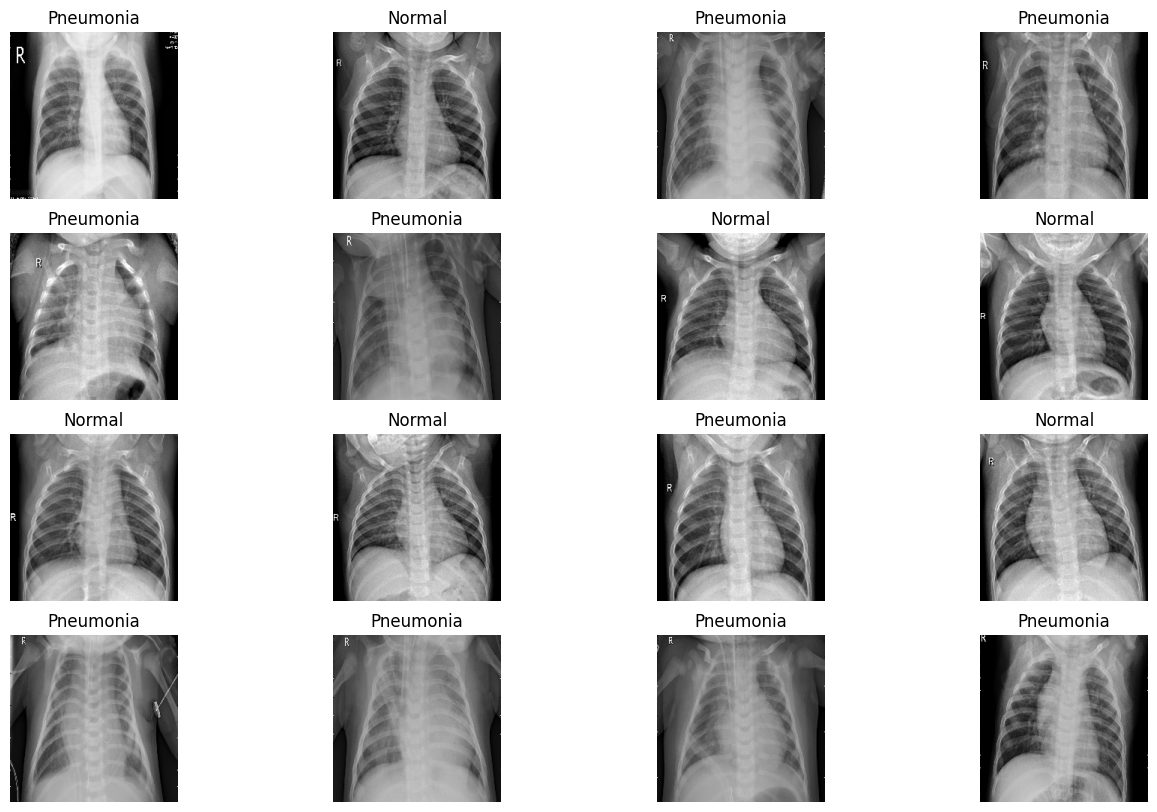

In [6]:
images,labels=train_dataset[0]
image_list=list(zip(images,labels))
fig,axs=plt.subplots(4,4,figsize=[16,10])
labels=["Normal","Pneumonia"]
axs=axs.ravel()
for idx,(image,label) in enumerate(image_list[:16]):
  axs[idx].imshow(cv2.cvtColor((image*0.5)+0.5,cv2.COLOR_RGB2GRAY),cmap="gray")
  axs[idx].set_title(labels[int(label)])
  axs[idx].axis("off")
plt.show()

In [16]:
resnet=tf.keras.applications.ResNet50(weights="imagenet",include_top=False)
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
for idx,layer in enumerate(resnet.layers):
  print(f"{idx} - {layer.name}")

0 - input_layer
1 - conv1_pad
2 - conv1_conv
3 - conv1_bn
4 - conv1_relu
5 - pool1_pad
6 - pool1_pool
7 - conv2_block1_1_conv
8 - conv2_block1_1_bn
9 - conv2_block1_1_relu
10 - conv2_block1_2_conv
11 - conv2_block1_2_bn
12 - conv2_block1_2_relu
13 - conv2_block1_0_conv
14 - conv2_block1_3_conv
15 - conv2_block1_0_bn
16 - conv2_block1_3_bn
17 - conv2_block1_add
18 - conv2_block1_out
19 - conv2_block2_1_conv
20 - conv2_block2_1_bn
21 - conv2_block2_1_relu
22 - conv2_block2_2_conv
23 - conv2_block2_2_bn
24 - conv2_block2_2_relu
25 - conv2_block2_3_conv
26 - conv2_block2_3_bn
27 - conv2_block2_add
28 - conv2_block2_out
29 - conv2_block3_1_conv
30 - conv2_block3_1_bn
31 - conv2_block3_1_relu
32 - conv2_block3_2_conv
33 - conv2_block3_2_bn
34 - conv2_block3_2_relu
35 - conv2_block3_3_conv
36 - conv2_block3_3_bn
37 - conv2_block3_add
38 - conv2_block3_out
39 - conv3_block1_1_conv
40 - conv3_block1_1_bn
41 - conv3_block1_1_relu
42 - conv3_block1_2_conv
43 - conv3_block1_2_bn
44 - conv3_block1_

In [17]:
output=resnet.output
x=tf.keras.layers.GlobalAveragePooling2D()(output)
x=tf.keras.layers.Dense(1024,activation="relu")(x)
x=tf.keras.layers.Dense(1024,activation="relu")(x)
x=tf.keras.layers.Dense(512,activation="relu")(x)
pred=tf.keras.layers.Dense(1,activation="sigmoid")(x)

In [18]:
model=tf.keras.models.Model(inputs=resnet.input,outputs=pred)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 27,260,801 (103.99 MB)

 Trainable params: 27,207,681 (103.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [11]:
for i,layer in enumerate(model.layers):
  print(f"{i} - {layer.name}")

0 - input_layer
1 - conv1_pad
2 - conv1_conv
3 - conv1_bn
4 - conv1_relu
5 - pool1_pad
6 - pool1_pool
7 - conv2_block1_1_conv
8 - conv2_block1_1_bn
9 - conv2_block1_1_relu
10 - conv2_block1_2_conv
11 - conv2_block1_2_bn
12 - conv2_block1_2_relu
13 - conv2_block1_0_conv
14 - conv2_block1_3_conv
15 - conv2_block1_0_bn
16 - conv2_block1_3_bn
17 - conv2_block1_add
18 - conv2_block1_out
19 - conv2_block2_1_conv
20 - conv2_block2_1_bn
21 - conv2_block2_1_relu
22 - conv2_block2_2_conv
23 - conv2_block2_2_bn
24 - conv2_block2_2_relu
25 - conv2_block2_3_conv
26 - conv2_block2_3_bn
27 - conv2_block2_add
28 - conv2_block2_out
29 - conv2_block3_1_conv
30 - conv2_block3_1_bn
31 - conv2_block3_1_relu
32 - conv2_block3_2_conv
33 - conv2_block3_2_bn
34 - conv2_block3_2_relu
35 - conv2_block3_3_conv
36 - conv2_block3_3_bn
37 - conv2_block3_add
38 - conv2_block3_out
39 - conv3_block1_1_conv
40 - conv3_block1_1_bn
41 - conv3_block1_1_relu
42 - conv3_block1_2_conv
43 - conv3_block1_2_bn
44 - conv3_block1_

In [19]:
for layer in model.layers[:175]:
  layer.trainable=False
for layer in model.layers[175:]:
  layer.trainable=True

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 27,260,801 (103.99 MB)

 Trainable params: 3,673,089 (14.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
loss=tf.keras.losses.BinaryCrossentropy()
optim=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optim,loss,metrics=['accuracy'])

In [21]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs=4)

Epoch 1/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 327ms/step - accuracy: 0.8974 - loss: 0.4181 - val_accuracy: 0.5625 - val_loss: 0.6395
Epoch 2/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 305ms/step - accuracy: 0.9773 - loss: 0.0633 - val_accuracy: 0.8750 - val_loss: 0.2373
Epoch 3/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 362ms/step - accuracy: 0.9817 - loss: 0.0510 - val_accuracy: 0.8125 - val_loss: 0.4879
Epoch 4/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 390ms/step - accuracy: 0.9800 - loss: 0.0560 - val_accuracy: 0.8125 - val_loss: 0.3308


In [22]:
history.history

{'accuracy': [0.9422929286956787,
  0.9760352969169617,
  0.9791027903556824,
  0.9829370975494385],
 'loss': [0.1854819506406784,
  0.06540345400571823,
  0.056700173765420914,
  0.04922056570649147],
 'val_accuracy': [0.5625, 0.875, 0.8125, 0.8125],
 'val_loss': [0.6395251750946045,
  0.23725175857543945,
  0.4879385232925415,
  0.33083376288414]}

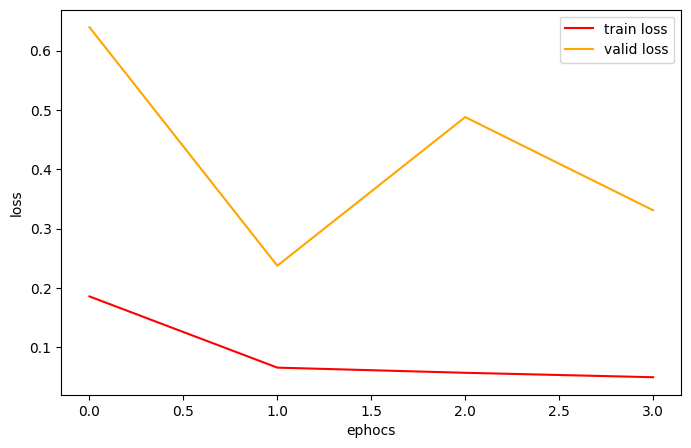

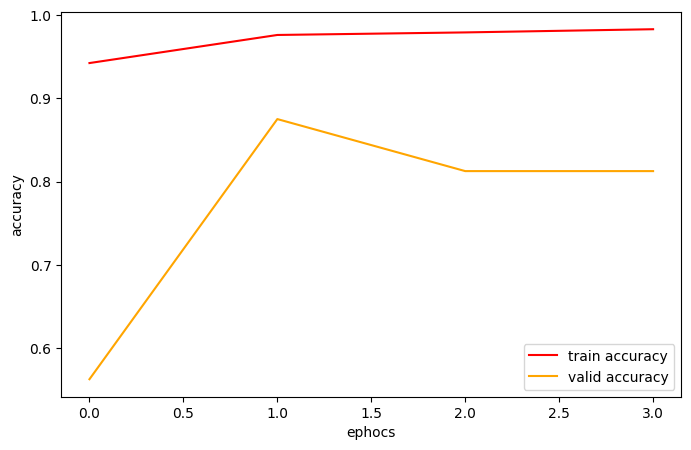

In [29]:
plt.figure(figsize=[8,5])
plt.plot(history.history["loss"],label="train loss",color="red")
plt.plot(history.history["val_loss"],label="valid loss",color="orange")
plt.xlabel("ephocs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.figure(figsize=[8,5])
plt.plot(history.history["accuracy"],label="train accuracy",color="red")
plt.plot(history.history["val_accuracy"],label="valid accuracy",color="orange")
plt.xlabel("ephocs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [31]:
test_evaluation=model.evaluate(test_dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.6339 - loss: 1.6373


In [32]:
test_evaluation

[0.9906443953514099, 0.7836538553237915]